In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet


!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="syqdfC3ZJwdqvNTveb2I")
project = rf.workspace("gasim-xaghz").project("person-rst2t")
dataset = project.version(2).download("yolov8")


In [ ]:
# Burada Yolo V8 modelinde bir eğitim gerçekleştiriyoruz

%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=5 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 49.6MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Person-2/data.yaml, epochs=5, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, o

In [ ]:
#  Burada Yolo V8 Modeli ile eğitmiş olduğumuz verileri  Ağırlıklarını Kaydetediliyor

!zip -r weights_2.zip /content/runs/detect/train/weights

  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/weights/best.pt (deflated 8%)
  adding: content/runs/detect/train/weights/last.pt (deflated 8%)


In [ ]:
# Burada yukarıda kaytetmiş olduğumuz verileri zip dosyasında çıkartıyoruz

!unzip /content/weights_2.zip

In [ ]:
################################################################################################################################################################################################################

Burada Yukarı Kısım ayrılıkta çalışmalı aynı zaman çalıştığında KÜTÜPHANELER ARASINDA ÇAKIŞMA OLUYOR

In [ ]:
################################################################################################################################################################################################################

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
SOURCE_VIDEO_PATH = "/content/pexels_videos_4.mp4"

In [ ]:
%cd {HOME}
!git clone https://github.com/ifzhang/ByteTrack.git
%cd {HOME}/ByteTrack

# workaround related to https://github.com/roboflow/notebooks/issues/80
!sed -i 's/onnx==1.8.1/onnx==1.9.0/g' requirements.txt

!pip3 install -q -r requirements.txt
!python3 setup.py -q develop
!pip install -q cython_bbox
!pip install -q onemetric
# workaround related to https://github.com/roboflow/notebooks/issues/112 and https://github.com/roboflow/notebooks/issues/106
!pip install -q loguru lap thop

from IPython import display
display.clear_output()


import sys
sys.path.append(f"{HOME}/ByteTrack")


import yolox
print("yolox.__version__:", yolox.__version__)

yolox.__version__: 0.1.0


In [ ]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
from dataclasses import dataclass


@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False

In [ ]:
!pip install supervision==0.1.0


from IPython import display
display.clear_output()


import supervision
print("supervision.__version__:", supervision.__version__)

In [ ]:
from supervision.draw.color import ColorPalette
# Bu kütüphane, videolarda nesneleri vurgulamak için kullanılan renk paletlerini sağlar. Örneğin, bir araba tespit edildiğinde, onu kırmızı bir kutu ile vurgulamak için bu kütüphaneden bir renk paleti kullanılabilir.

from supervision.geometry.dataclasses import Point
# Bu kütüphane, nesne algılama ve takip gibi uygulamalarda kullanılan geometrik şekilleri temsil eden veri sınıfları sağlar. Örneğin, bir nesne tespit edildiğinde, onun koordinatlarını ve boyutlarını temsil eden bir Point veri sınıfı kullanılabilir.

from supervision.video.dataclasses import VideoInfo
# Bu kütüphane, videoları ve video kliplerini temsil eden veri sınıfları sağlar. Örneğin, bir videonun meta verilerini (örneğin, çözünürlüğü ve kare hızını) temsil eden bir VideoInfo veri sınıfı kullanılabilir.

from supervision.video.source import get_video_frames_generator
# Bu kütüphane, video kliplerden çerçeveleri okumak için bir sınıf sağlar. Örneğin, bir video klipten tüm kareleri okumak için bu sınıftan bir nesne oluşturulabilir.

from supervision.video.sink import VideoSink
# Bu kütüphane, video kliplere çerçeveleri yazmak için bir sınıf sağlar. Örneğin, bir video klipte yapılan değişiklikleri kaydetmek için bu sınıftan bir nesne oluşturulabilir.

from supervision.notebook.utils import show_frame_in_notebook
# Bu kütüphane, Jupyter Notebook'ta videoları görüntülemek için bir sınıf sağlar. Örneğin, bir video klipteki bir kareyi Jupyter Notebook'ta görüntülemek için bu sınıftan bir nesne oluşturulabilir.

from supervision.tools.detections import Detections, BoxAnnotator
# Bu kütüphane, nesne algılama sonuçlarının temsili için veri sınıfları sağlar. Örneğin, bir video klibinde tespit edilen tüm nesneleri temsil eden bir Detections veri sınıfı kullanılabilir.

from supervision.tools.line_counter import LineCounter, LineCounterAnnotator

# Bu kütüphane, bir videoda nesnelerin bir çizgiyi geçmesini saymak için bir sınıf sağlar. Örneğin, bir videoda arabaların bir çizgiyi geçmesini saymak için bu sınıftan bir nesne oluşturulabilir.

# Bu kütüphaneler birlikte, videolarda nesne algılama, takip ve sayma gibi görevleri gerçekleştirmek için kullanılabilir. Örneğin, bir video klibinde arabaları tespit edebilir, takip edebilir ve bir çizgiyi geçtiklerinde sayabilirsiniz.

# Bu kütüphaneler, videolarda nesne algılama ve takip gibi görevler için araştırma ve geliştirme yapmak için de kullanılabilir. Örneğin, yeni nesne algılama algoritmaları geliştirmek veya mevcut algoritmaların performansını iyileştirmek için bu kütüphaneler kullanılabilir.








In [ ]:
# Bu kod, nesne takip sistemlerinde kullanılan bir algoritmanın bir parçasıdır. Bu algoritma, yeni tespit edilen nesneleri mevcut takip edilen nesnelerle eşleştirmeye çalışır.

# Algoritma şu şekilde çalışır:

# Öncelikle, yeni tespit edilen nesneleri ve mevcut takip edilen nesneleri kutulara dönüştürür.
# Ardından, bu kutular arasındaki kesişim oranı (IOU) hesaplanır.
# Son olarak, IOU'ları en yüksek olan kutular eşleştirilir.

from typing import List

import numpy as np


# converts Detections into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections: Detections) -> np.ndarray:
    return np.hstack((
        detections.xyxy,
        detections.confidence[:, np.newaxis]
    ))


# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)


# matches our bounding boxes with predictions
def match_detections_with_tracks(
    detections: Detections,
    tracks: List[STrack]
) -> Detections:
    if not np.any(detections.xyxy) or len(tracks) == 0:
        return np.empty((0,))

    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detections.xyxy)
    track2detection = np.argmax(iou, axis=1)

    tracker_ids = [None] * len(detections)

    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            tracker_ids[detection_index] = tracks[tracker_index].track_id

    return tracker_ids


    ''' Bu algoritma, nesne takip sistemlerinde yaygın olarak kullanılmaktadır. Bu algoritma sayesinde, nesne takip sistemleri, videodaki nesneleri takip ederken daha doğru sonuçlar elde edebilir.

Örneğin, bu algoritma, bir videoda arabaları takip eden bir nesne takip sistemi için kullanılabilir. Sistem, yeni bir araba tespit ettiğinde, bu algoritmayı kullanarak tespit edilen arabayı mevcut takip edilen arabalarla eşleştirebilir. Sistem, eşleşen bir araba yoksa, yeni tespit edilen arabayı yeni bir takip edilecek nesne olarak ekleyebilir.

Bu algoritma, nesne takip sistemlerinin performansını iyileştirmek için önemli bir adımdır. '''

In [ ]:
# Burada yukarıda kaytetmiş olduğumuz verileri zip dosyasında çıkartıyoruz

!unzip /content/weights_4.zip

Archive:  /content/weights_4.zip
   creating: content/runs/detect/train/weights/
  inflating: content/runs/detect/train/weights/best.pt  
  inflating: content/runs/detect/train/weights/last.pt  


In [ ]:

# Yukarıda zip dosyasında çıkarılış verini eğtim verisin buraya kayıt edip çalıştırıyoruz

MODEL = "content/runs/detect/train/weights/best.pt"

MODEL

'content/runs/detect/train/weights/best.pt'

In [ ]:
from ultralytics import YOLO

model = YOLO(MODEL)
model.fuse()

Model summary (fused): 168 layers, 11125971 parameters, 0 gradients


In [ ]:
# dict maping class_id to class_name
CLASS_NAMES_DICT = model.model.names
# class_ids of interest - car, motorcycle, bus and truck
CLASS_ID = [0]


In [ ]:
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create instance of BoxAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=4, text_scale=2)
# acquire first video frame
iterator = iter(generator)
frame = next(iterator)
# model prediction on single frame and conversion to supervision Detections
results = model(frame)
detections = Detections(
    xyxy=results[0].boxes.xyxy.cpu().numpy(),
    confidence=results[0].boxes.conf.cpu().numpy(),
    class_id=results[0].boxes.cls.cpu().numpy().astype(int)
)
# format custom labels
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for _, confidence, class_id, tracker_id
    in detections
]
# annotate and display frame
frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)

%matplotlib inline
show_frame_in_notebook(frame, (16, 16))

TypeError: ignored


0: 480x800 27 Persons, 105.5ms
Speed: 19.6ms preprocess, 105.5ms inference, 23.1ms postprocess per image at shape (1, 3, 480, 800)


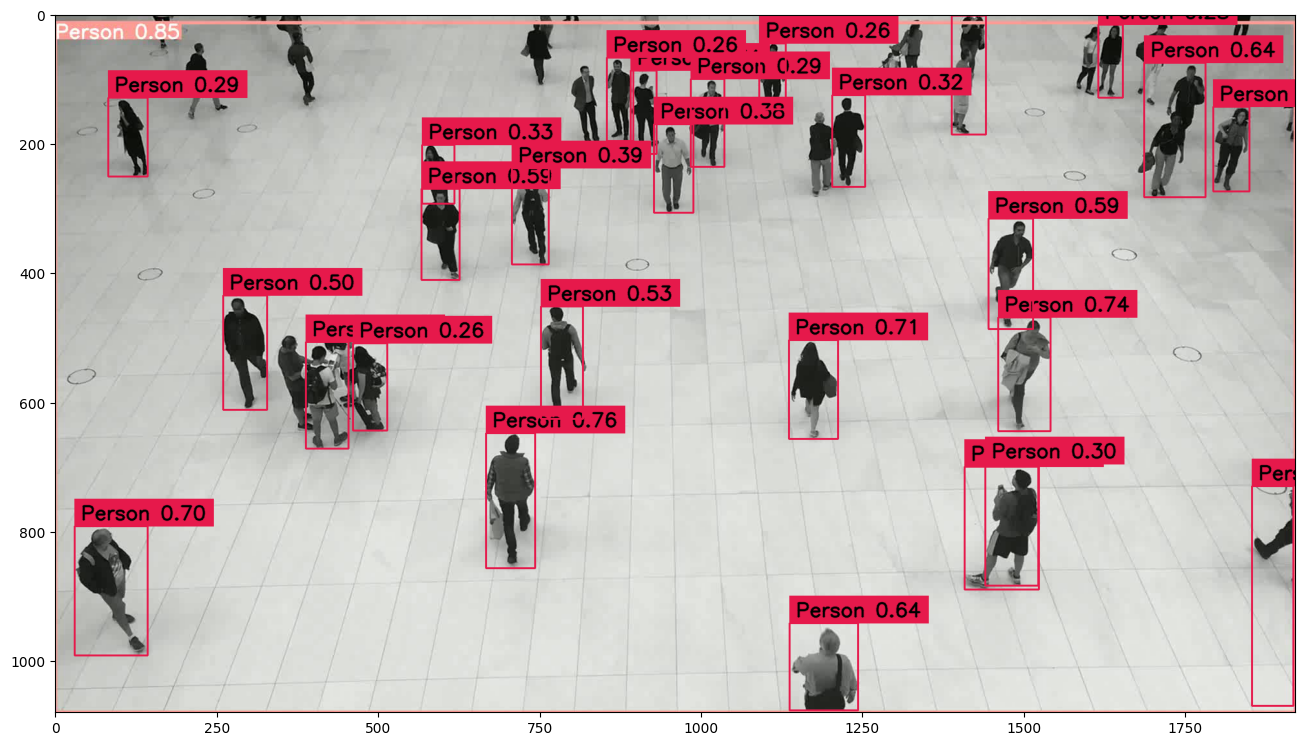

In [ ]:
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# Bu satır, videoyu frame'lere bölmek için bir frame jeneratörü oluşturur. SOURCE_VIDEO_PATH parametresi, video dosyasının yolunu belirtir
# create instance of BoxAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=2, text_thickness=2, text_scale=1)
# Bu satır, frame'lere nesne etiketlemelerini eklemek için bir BoxAnnotator nesnesi oluşturur. Parametreler, nesne etiketlerinin renkini, kalınlığını ve metin boyutunu kontrol eder.
# acquire first video frame
iterator = iter(generator)
frame = next(iterator)
# Bu satır, videodan ilk frame'i alır.
# model prediction on single frame and conversion to supervision Detections
results = model(frame)
detections = Detections(
    xyxy=results[0].boxes.xyxy.cpu().numpy(),
    confidence=results[0].boxes.conf.cpu().numpy(),
    class_id=results[0].boxes.cls.cpu().numpy().astype(int)

# Bu satır, videodan alınan ilk frame'e nesne tespiti yapan bir model çalıştırır. Sonuçlar, Detections nesnesi olarak döndürülür.
)
# format custom labels
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for _, confidence, class_id, tracker_id
    in detections
]
# Bu satır, custom etiketleri formatlar. Custom etiketler, CLASS_NAMES_DICT sözlüğünde tanımlanmıştır.



# annotate and display frame
frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)
# Bu satır, frame'lere nesne etiketlemelerini ekler.



%matplotlib inline
show_frame_in_notebook(frame, (16, 16))

# Bu satır, frame'i notebook'ta görüntüler. Parametreler, frame'in boyutunu kontrol eder.

# Kod diziliminin çalışma akışı şu şekildedir:

# Videodan frame'lere bölünür.
# Her frame'e nesne tespiti yapan bir model çalıştırılır.
# Custom etiketler formatlanır.
# Frame'lere nesne etiketlemeleri eklenir.
# Frame'ler notebook'ta görüntülenir.
# Bu kod dizilimini kullanarak, videodaki nesneleri tespit edebilir ve etiketleyebilirsiniz.



# Bu satır, show_frame_in_notebook() fonksiyonunu kullanarak frame'leri notebook'ta görüntüler. Parametreler, frame'in boyutunu kontrol eder.

# Kod diziliminin daha ayrıntılı açıklamalarına gelince:

# generator = get_video_frames_generator(SOURCE_VIDEO_PATH) satırında,
# get_video_frames_generator() fonksiyonunu kullanarak videodan frame'lere bölünür. SOURCE_VIDEO_PATH parametresi, video dosyasının yolunu belirtir.
# results = model(frame) satırında, model() fonksiyonunu kullanarak frame'e nesne tespiti yapan bir model çalıştırılır. Sonuçlar, Detections nesnesi olarak döndürülür.
# **detections = Detections(xyxy=results[0].boxes.xyxy.cpu().numpy(), confidence=results[0].boxes.conf.cpu().numpy(), class_id=results[0].boxes.cls.cpu().numpy().astype(int))** satırında, Detections nesnesi oluşturulur. Bu nesne, frame'de tespit edilen nesnelerin konumlarını, güvenilirlik derecelerini ve sınıflarını içerir.
# labels = [f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}" for _, confidence, class_id, tracker_id in detections] satırında, CLASS_NAMES_DICT sözlüğünde tanımlanmış olan custom etiketler formatlanır.
# frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels) satırında, box_annotator.annotate() fonksiyonunu kullanarak frame'lere nesne etiketlemeleri eklenir.
# %matplotlib inline show_frame_in_notebook(frame, (16, 16)) satırında, show_frame_in_notebook() fonksiyonunu kullanarak frame'leri notebook'ta görüntülenir. Parametreler, frame'in boyutunu kontrol eder.
# Umarım bu açıklamalar yardımcı olmuştur. Başka sorularınız varsa lütfen bana bildirin.

In [ ]:
# settings
LINE_START = Point(750,500)
LINE_END = Point(1600, 500)

TARGET_VIDEO_PATH = f"{HOME}/vehicle-counting-result_2.mp4"

In [ ]:
from tqdm.notebook import tqdm


# create BYTETracker instance
byte_tracker = BYTETracker(BYTETrackerArgs())
# create VideoInfo instance
video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create LineCounter instance
line_counter = LineCounter(start=LINE_START, end=LINE_END)
# create instance of BoxAnnotator and LineCounterAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=2, text_thickness=2, text_scale=0.7)
line_annotator = LineCounterAnnotator(thickness=4, text_thickness=4, text_scale=2)

# open target video file
with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    # loop over video frames
    for frame in tqdm(generator, total=video_info.total_frames):
        # model prediction on single frame and conversion to supervision Detections
        results = model(frame)
        detections = Detections(
            xyxy=results[0].boxes.xyxy.cpu().numpy(),
            confidence=results[0].boxes.conf.cpu().numpy(),
            class_id=results[0].boxes.cls.cpu().numpy().astype(int)
        )
        # filtering out detections with unwanted classes
        mask = np.array([class_id in CLASS_ID for class_id in detections.class_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # tracking detections
        tracks = byte_tracker.update(
            output_results=detections2boxes(detections=detections),
            img_info=frame.shape,
            img_size=frame.shape
        )
        tracker_id = match_detections_with_tracks(detections=detections, tracks=tracks)
        detections.tracker_id = np.array(tracker_id)
        # filtering out detections without trackers
        mask = np.array([tracker_id is not None for tracker_id in detections.tracker_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # format custom labels
        labels = [
            f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
            for _, confidence, class_id, tracker_id
            in detections
        ]
        # updating line counter
        line_counter.update(detections=detections)
        # annotate and display frame
        frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)
        line_annotator.annotate(frame=frame, line_counter=line_counter)
        sink.write_frame(frame)

  0%|          | 0/341 [00:00<?, ?it/s]


0: 480x800 27 Persons, 15.5ms
Speed: 4.0ms preprocess, 15.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 24 Persons, 15.5ms
Speed: 6.5ms preprocess, 15.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 24 Persons, 15.4ms
Speed: 5.2ms preprocess, 15.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 27 Persons, 15.5ms
Speed: 4.3ms preprocess, 15.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 25 Persons, 15.4ms
Speed: 4.0ms preprocess, 15.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 26 Persons, 15.5ms
Speed: 5.1ms preprocess, 15.5ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 28 Persons, 15.4ms
Speed: 4.5ms preprocess, 15.4ms inference, 4.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 24 Persons, 15.5ms
Speed: 5.1ms preprocess, 15.5ms inference, 1.5ms postprocess per image at